# ¿Cuál casa comprar?

## Introducción

En el sector inmobiliario, un problema de especial interés es el de determinar el precio mas adecuado de compra o de venta de casas-habitación. Los dueños de los inmuebles (o las compañías inmobiliarias) suelen tomar en cuenta diferentes aspectos y condiciones para definir dicho precio. Una forma de estandarizar este mercado, sería el medir el efecto que tienen algunas de las características del inmueble sobre el precio que se estipula. Se llevó a cabo un estudio piloto en este sentido con el fin de obtener información que permita, posteriormente, diseñar un estudio a gran escala para responder al objetivo de estandarización. En el estudio piloto se seleccionaron 26 casas en venta y se registró las siguientes variables:

## Variables

* RECAM: Número de recámaras.
* AREA: Metros cuadrados de construcción.
* CHIM: Variable dicotómica que indica si la casa tiene o no chimenea.
* CUARTOS: Número de cuartos que tiene la casa.
* CONTRAV: Variable dicotómica que indica si la casa tiene o no contra ventanas.
* LONGFR: Longitud del frente en metros.
* BAÑOS: El número de baños que tiene la casa.
* CON: Variable dicotómica que indica si la construcción es de ladrillo o tiene madera. 
* COCHERA: Número de autos.
* COND: Variable dicotómica que indica si la casa necesita arreglos mayores. 
* ZONA: Variable categórica que indica la zona de la ciudad en donde se localiza la casa.
* PRECIO: En miles de pesos.

A continuación leeemos nuestros datos

In [1]:
import pandas as pd #Para poder trabajar con el dataframe
import numpy as np #Para utilizar arreglos
import matplotlib.pyplot as plt #Para graficar
import seaborn as sns # Para visualización

# Cargamos la base de datos (archivo csv)
casas = pd.read_csv("/Users/ivanvegagutierrez/Desktop/CIMAT/SEGUNDO/MODEST2/tareas/04_tarea/Casas.csv")
# Vemos los tipos de datos que tenemos
casas.dtypes
# Proporciona los estadísticos más importantes
casas.describe()
# Reenombramos variables
casas.columns = ["Id","RECAM","AREA","CHIM","CUARTOS","CONTRAV","LONGFR","BANOS","CON","COCH","COND","ZONA","PRECIO"]
# Eliminamos la variable Id ya que no proporciona información
del casas['Id']
# Cambiamos algunos tipos de datos
casas['RECAM'] = casas[['RECAM']].astype(float)
casas['PRECIO'] = casas[['PRECIO']].astype(float)
#Mostramos nuestra base de datos
casas.dtypes

RECAM      float64
AREA       float64
CHIM         int64
CUARTOS    float64
CONTRAV      int64
LONGFR     float64
BANOS      float64
CON          int64
COCH       float64
COND         int64
ZONA         int64
PRECIO     float64
dtype: object

## Análisis descriptivo

A continuación se hará uso de la librera pandas profiling la cual es capaz de realizar un análisis exploratorio de los datos.

In [2]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [3]:
profile = ProfileReport(casas, title="Análisis Exploratorio de Datos")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Lo anterior, nos da una idea completa sobre como se están comportando nuestros datos. A continuación mostramos resultados más específicos para resaltar los datos más importantes.

### Gráfico de distribución

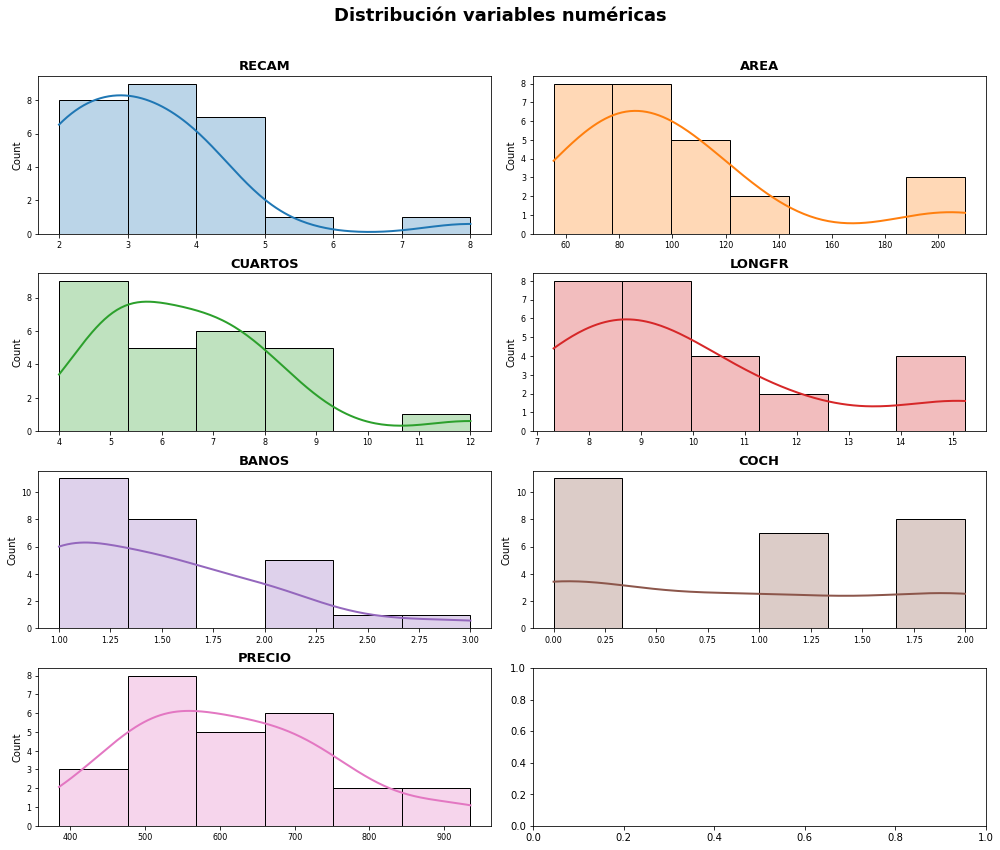

In [4]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12))
axes = axes.flat
columnas_numeric = casas.select_dtypes(include=['float64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = casas,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 13, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 18, fontweight = "bold");

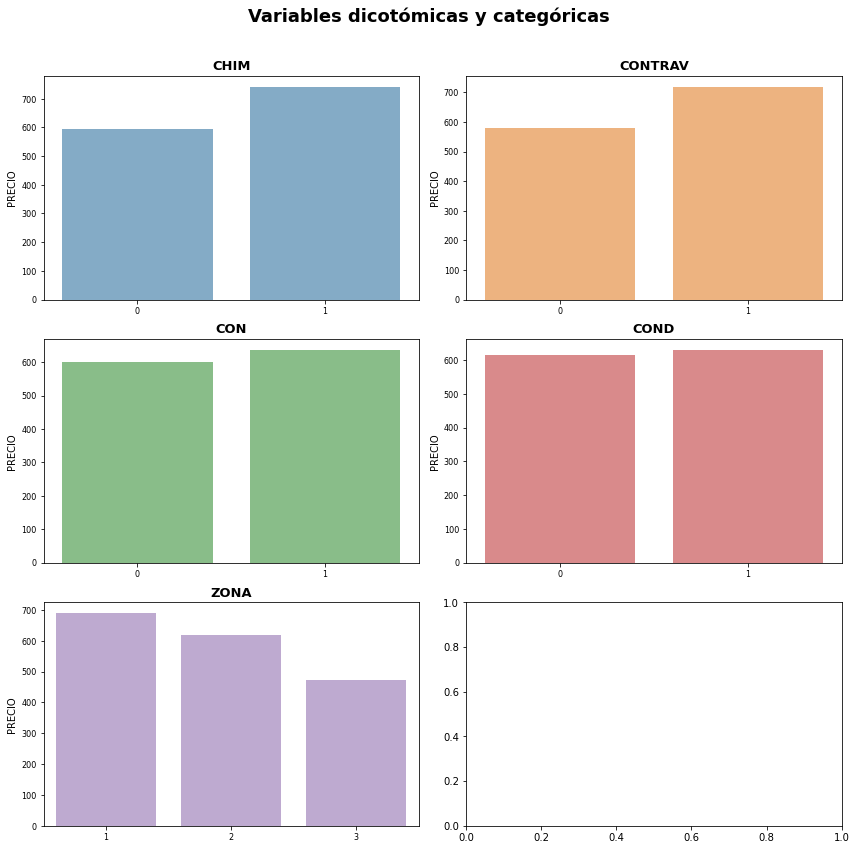

In [62]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
axes = axes.flat
columnas_numeric = casas.select_dtypes(include=['int64']).columns

for i, colum in enumerate(columnas_numeric):
    sns.barplot(
        data    = casas,
        y = 'PRECIO',
        x       = colum,
        #hue = colum,
        #y       = 'count',
        #stat    = "count",
        #kde     = False,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        #line_kws= {'linewidth': 2},
        alpha   = 0.6,
        ax      = axes[i],
        ci = 0
    )
    axes[i].set_title(colum, fontsize = 13, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Variables dicotómicas y categóricas', fontsize = 18, fontweight = "bold");

## Análisis de Correlación

In [6]:
# Correlación entre columnas numéricas
# ==============================================================================

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)

corr_matrix = casas.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
3,RECAM,CUARTOS,0.917525,0.917525
36,CUARTOS,RECAM,0.917525,0.917525
37,CUARTOS,AREA,0.740074,0.740074
15,AREA,CUARTOS,0.740074,0.740074
133,PRECIO,AREA,0.735926,0.735926
23,AREA,PRECIO,0.735926,0.735926
75,BANOS,CUARTOS,0.687434,0.687434
42,CUARTOS,BANOS,0.687434,0.687434
1,RECAM,AREA,0.675309,0.675309
12,AREA,RECAM,0.675309,0.675309


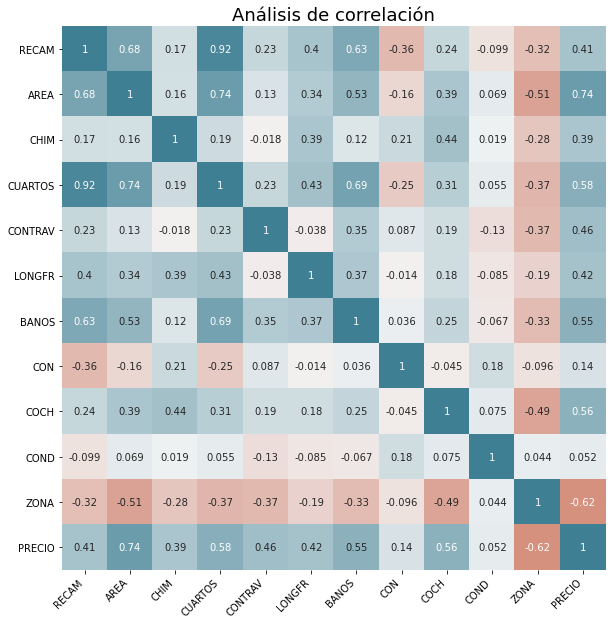

In [7]:
# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)
plt.title("Análisis de correlación",fontsize=18)
ax.tick_params(labelsize = 10)

## Análisis de varianza

A continuación se hace uso de la librería statsmodels, la cual nos permitirá hacer la prueba ANOVA de los variables dicotómicas y categóricas. 

In [8]:
import statsmodels.api as sm
formula = 'PRECIO ~ CHIM + CONTRAV + CON + COND + ZONA'

model = sm.formula.ols(formula, data= casas).fit()
aov_table =  sm.stats.anova_lm(model,typ=2)
print(aov_table)

                 sum_sq    df         F    PR(>F)
CHIM       32561.890857   1.0  2.851967  0.106794
CONTRAV    40406.138048   1.0  3.539014  0.074580
CON           53.298125   1.0  0.004668  0.946206
COND        5294.632579   1.0  0.463736  0.503692
ZONA       68698.164788   1.0  6.017000  0.023470
Residual  228346.898789  20.0       NaN       NaN


## Análisis de Regresión Lineal

Como primer modelo, generamos un modelo de regresión lineal multimple considerando todas las variables.

In [23]:
import statsmodels.formula.api as smf

model  = smf.ols('PRECIO ~ RECAM + AREA + CUARTOS + LONGFR + BANOS + COCH + C(CHIM) + C(CONTRAV) + C(CON) + C(COND) + C(ZONA)',casas)
result = model.fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     16.50
Date:                Fri, 13 May 2022   Prob (F-statistic):           6.30e-06
Time:                        09:11:24   Log-Likelihood:                -128.34
No. Observations:                  26   AIC:                             282.7
Df Residuals:                      13   BIC:                             299.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         189.1762     63.655     

## Análisis de residuos

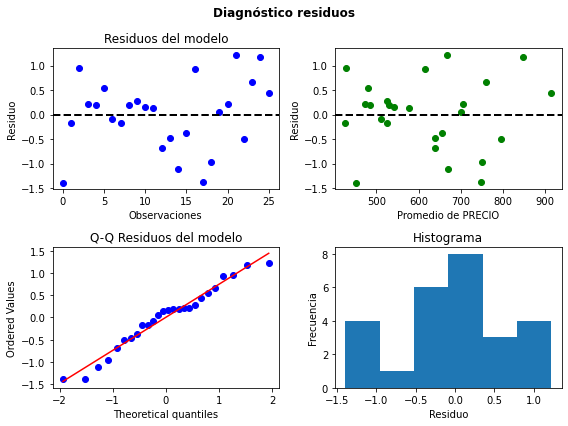

In [53]:
import scipy.stats as st

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(221)
ax.scatter(np.arange(len(casas)), result.resid_pearson, color='blue')
ax.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
ax.set_xlabel('Observaciones')
ax.set_ylabel('Residuo')
ax.set_title('Residuos del modelo')

ax = fig.add_subplot(222)
ax.scatter(result.fittedvalues, result.resid_pearson, color='green')
ax.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
ax.set_xlabel('Promedio de PRECIO')
ax.set_ylabel('Residuo')

ax = fig.add_subplot(223)
st.probplot(result.resid_pearson, plot=ax)
ax.set_title('Q-Q Residuos del modelo')

ax = fig.add_subplot(224)
ax.hist(result.resid_pearson, bins=6)
ax.set_xlabel('Residuo')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma')


fig.suptitle('Diagnóstico residuos', fontsize = 12, fontweight = "bold");
plt.tight_layout()


In [66]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = st.shapiro(result.resid_pearson)
shapiro_test

ShapiroResult(statistic=0.9641860127449036, pvalue=0.4805428087711334)

In [68]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(result.resid, result.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, white_test)))

{'LM Statistic': 26.0, 'LM-Test p-value': 0.407598691417447, 'F-Statistic': nan, 'F-Test p-value': nan}


## Machine Learning

Un paso importante para la aplicación de algún método de machine learning, es la sepración de los datos en datos de entrenamiento y datos de prueba. A continuación el 80% de los datos son de entrenamiento y el 20% serán datos de prueba.

In [72]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        casas.drop('PRECIO', axis = 'columns'),
                                        casas['PRECIO'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )
X_test

,RECAM,AREA,CHIM,CUARTOS,CONTRAV,LONGFR,BANOS,CON,COCH,COND,ZONA
7,3.0,80.08,0,6.0,0,7.62,1.0,1,0.0,0,2
16,2.0,72.65,0,5.0,1,7.62,1.0,0,0.0,0,2
2,3.0,55.37,0,5.0,0,15.24,1.0,0,0.0,0,3
3,4.0,83.33,0,7.0,0,7.62,2.0,0,1.0,0,1
1,3.0,69.02,0,6.0,0,7.62,1.0,1,0.0,0,3
18,3.0,102.19,1,7.0,0,15.24,1.5,1,2.0,0,1


In [78]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
# Preprocedado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Pipeline
# ==============================================================================

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Train
# ==============================================================================
# Se asigna el resultado a _ para que no se imprima por pantalla
_ = pipe.fit(X=X_train, y=y_train)

### Método KNN

In [92]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.neighbors import KNeighborsRegressor
import multiprocessing

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', KNeighborsRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__n_neighbors': np.linspace(1, 100, 500, dtype=int)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

/Users/ivanvegagutierrez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [          nan           nan           nan           nan           nan
           nan -111.93913987           nan           nan           nan
           nan           nan -112.97038339           nan           nan
  -98.42531959           nan           nan           nan           nan]
  warnings.warn(
/Users/ivanvegagutierrez/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the train scores are non-finite: [          nan           nan           nan           nan           nan
           nan    0.                   nan           nan           nan
           nan           nan -102.40432409           nan           nan
  -67.40004636           nan           nan           nan           nan]
  warnings.warn(


,param_modelo__n_neighbors,mean_test_score,std_test_score,mean_train_score,std_train_score
15,3,-98.42532,28.248943,-67.400046,6.403518


<ipython-input-93-8932f5c7ca40>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.fill_between(resultados[hiperparametro].astype(np.int),
<ipython-input-93-8932f5c7ca40>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depre

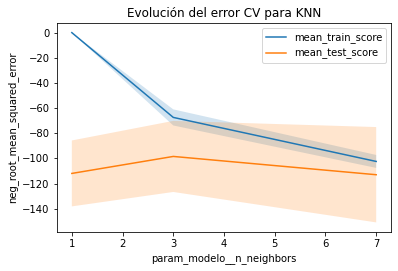

In [93]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__n_neighbors'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV para KNN')
ax.set_ylabel(metrica);

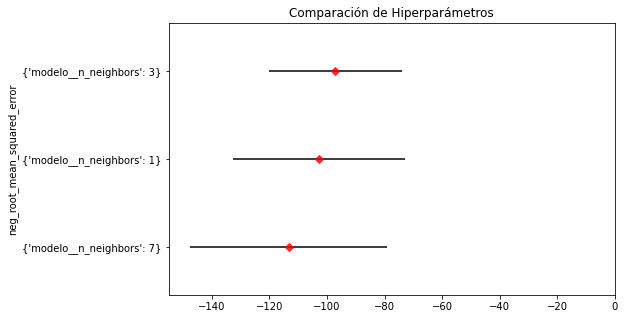

In [82]:
fig, ax = plt.subplots(figsize=(8, 5))

resultados = resultados.sort_values('mean_test_score', ascending = True)

ax.barh(
    [str(d) for d in resultados['params']],
    resultados['mean_test_score'],
    xerr=resultados['std_test_score'],
    align='center',
    alpha=0
)
ax.plot(
    resultados['mean_test_score'],
    [str(d) for d in resultados['params']],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Comparación de Hiperparámetros')
ax.set_ylabel(metrica);

In [85]:
from sklearn.metrics import mean_squared_error
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_knn = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
           )
print(f"El error (rmse) de test es: {rmse_knn}")

El error (rmse) de test es: 74.71067651403771


### Random Forest

In [86]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.ensemble import RandomForestRegressor

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', RandomForestRegressor())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro

param_distributions = {
    'modelo__n_estimators': [50, 100, 1000, 2000],
    'modelo__max_features': ["auto", 3, 5, 7],
    'modelo__max_depth'   : [None, 3, 5, 10, 20]
}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3),
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__n_estimators,param_modelo__max_features,param_modelo__max_depth,mean_test_score,std_test_score,mean_train_score,std_train_score
4,100,3,20,-106.695002,36.834639,-40.46773,3.602116


In [87]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_rf = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_rf}")

El error (rmse) de test es: 80.26008368630909


### Modelo de Regresión Lineal (Ridge y Laso)

In [95]:
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold
from sklearn.linear_model import Ridge

# Pipeline: preprocesado + modelo
# ==============================================================================
# Identificación de columnas numéricas y catégoricas
numeric_cols = X_train.select_dtypes(include=['float64']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['int']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[('scaler', StandardScaler())]
                      )

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
                          )

preprocessor = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline.
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', Ridge())])

# Optimización de hiperparámetros
# ==============================================================================
# Espacio de búsqueda de cada hiperparámetro
param_distributions = {'modelo__alpha': np.logspace(-5, 5, 500)}

# Búsqueda random grid
grid = RandomizedSearchCV(
        estimator  = pipe,
        param_distributions = param_distributions,
        n_iter     = 20,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits = 5, n_repeats = 3), 
        refit      = True, 
        verbose    = 0,
        random_state = 123,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)')\
    .drop(columns = 'params')\
    .sort_values('mean_test_score', ascending = False)\
    .head(1)

,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
11,1.952456,-74.357369,23.766109,-32.871586,3.301641


<ipython-input-96-85faeb4d7bc9>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.fill_between(resultados[hiperparametro].astype(np.int),
<ipython-input-96-85faeb4d7bc9>:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depre

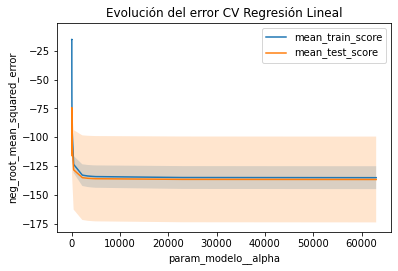

In [96]:
# Gráfico resultados validación cruzada para cada hiperparámetro
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3.84))
hiperparametro = 'param_modelo__alpha'
resultados = resultados.sort_values(hiperparametro, ascending = False)
metrica    = grid.scoring

resultados.plot(hiperparametro, 'mean_train_score', ax=ax)
resultados.plot(hiperparametro, 'mean_test_score', ax=ax)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_train_score'] + resultados['std_train_score'],
                resultados['mean_train_score'] - resultados['std_train_score'],
                alpha=0.2)
ax.fill_between(resultados[hiperparametro].astype(np.int),
                resultados['mean_test_score'] + resultados['std_test_score'],
                resultados['mean_test_score'] - resultados['std_test_score'],
                alpha=0.2)
ax.legend()
ax.set_title('Evolución del error CV Regresión Lineal')
ax.set_ylabel(metrica);

In [90]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse_lm = mean_squared_error(
            y_true  = y_test,
            y_pred  = predicciones,
            squared = False
          )
print(f"El error (rmse) de test es: {rmse_lm}")

El error (rmse) de test es: 77.45566485608906


## Segundo modelo de regresión 

In [105]:
import statsmodels.formula.api as smf

model  = smf.ols('PRECIO ~ RECAM + AREA + LONGFR + COCH + C(CONTRAV)',casas)
result = model.fit()
resultado = result.summary()
print(resultado)

                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     19.97
Date:                Fri, 13 May 2022   Prob (F-statistic):           3.72e-07
Time:                        23:55:07   Log-Likelihood:                -141.29
No. Observations:                  26   AIC:                             294.6
Df Residuals:                      20   BIC:                             302.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         275.3250     52.838     

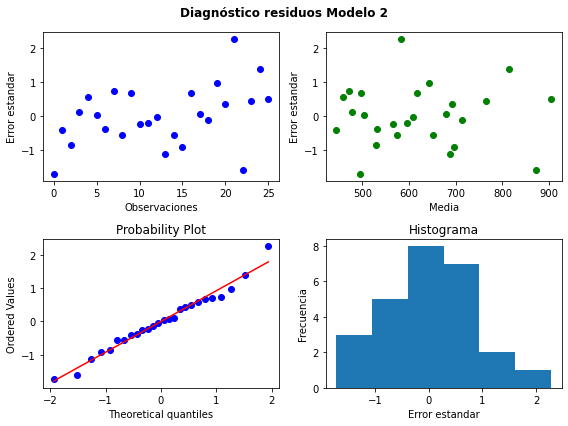

In [106]:
import scipy.stats as st

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(221)
ax.scatter(np.arange(len(casas)), result.resid_pearson, color='blue')
ax.set_xlabel('Observaciones')
ax.set_ylabel('Error estandar')

ax = fig.add_subplot(222)
ax.scatter(result.fittedvalues, result.resid_pearson, color='green')
ax.set_xlabel('Media')
ax.set_ylabel('Error estandar')

ax = fig.add_subplot(223)
st.probplot(result.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(result.resid_pearson, bins=6)
ax.set_xlabel('Error estandar')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma')
fig.suptitle('Diagnóstico residuos Modelo 2', fontsize = 12, fontweight = "bold");
plt.tight_layout()

## Tercer modelo segun los métodos Forward, Backward y Stepwise

In [98]:
import statsmodels.formula.api as smf

model  = smf.ols('PRECIO ~ RECAM + AREA + LONGFR + COCH + C(CONTRAV) + CUARTOS + C(CHIM)',casas)
result = model.fit()
resultado = result.summary()
print(resultado)

                            OLS Regression Results                            
Dep. Variable:                 PRECIO   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     22.81
Date:                Fri, 13 May 2022   Prob (F-statistic):           1.01e-07
Time:                        23:37:11   Log-Likelihood:                -134.80
No. Observations:                  26   AIC:                             285.6
Df Residuals:                      18   BIC:                             295.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         207.0453     57.531     

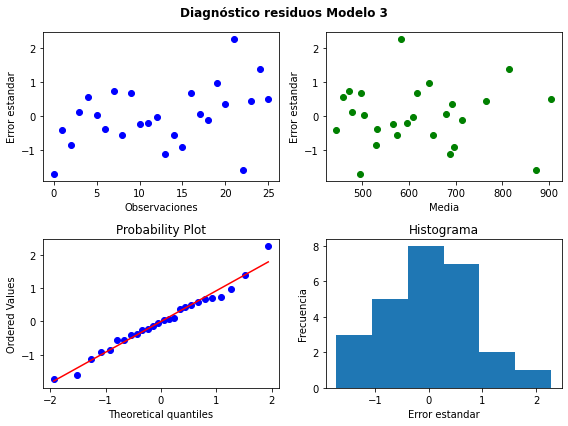

In [107]:
import scipy.stats as st

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(221)
ax.scatter(np.arange(len(casas)), result.resid_pearson, color='blue')
ax.set_xlabel('Observaciones')
ax.set_ylabel('Error estandar')

ax = fig.add_subplot(222)
ax.scatter(result.fittedvalues, result.resid_pearson, color='green')
ax.set_xlabel('Media')
ax.set_ylabel('Error estandar')

ax = fig.add_subplot(223)
st.probplot(result.resid_pearson, plot=ax)

ax = fig.add_subplot(224)
ax.hist(result.resid_pearson, bins=6)
ax.set_xlabel('Error estandar')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma')
fig.suptitle('Diagnóstico residuos Modelo 3', fontsize = 12, fontweight = "bold");

plt.tight_layout()